## Computer Vision
### Module 4.  Geometry and Augmented Reality

#### Task 4.2: 
Rewrite method to ﬁnd ellipse by 6 points

    1.How stable is 5-point method to errors?
    2.How stable is 6-point method to errors?
    
#### by Anastasiia Kasprova

    Link to Google Colab: https://colab.research.google.com/drive/1UFNQ_vv6XF0YKWLGPe6PQnk6F1vI0pUF
    Link to github: https://github.com/kasprova/CV_UCU/tree/master/module4/tasks/task1

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


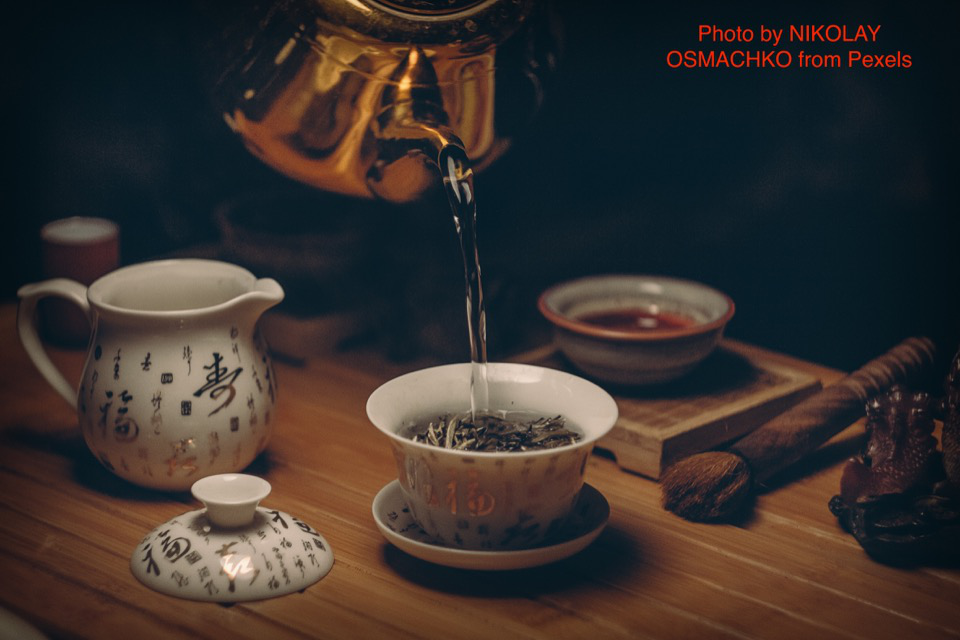

In [0]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)
cv2_imshow(imgc)

### Find ellipse by 5-point

[[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]
Ellipse 
[[-2.18569767e-08]]
[[-2.45345291e-08]]
[[-2.19079084e-08]]
[[-2.42143869e-08]]
[[-2.49710865e-08]]
u =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
m1v.T =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
v =  [[-3.17619447e-04 -2.09090136e-03  9.99997764e-01]
 [ 6.51716385e-01 -7.58461504e-01 -1.37887347e-03]
 [-7.58462690e-01 -6.51714489e-01 -1.60357680e-03]]
usv =  [[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]


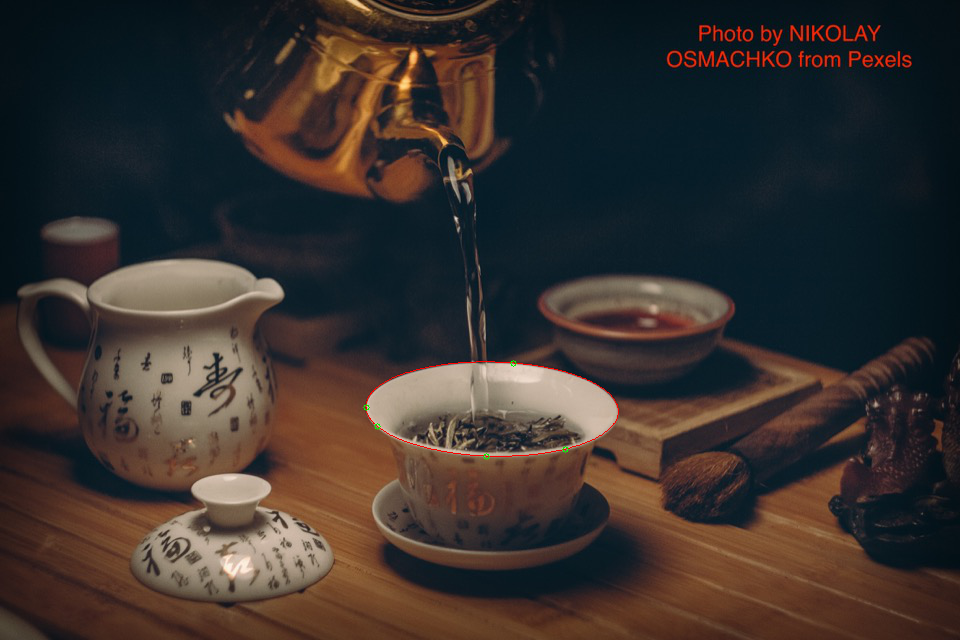

In [0]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

#### 4.2.1 Check whether 5-points mathod is stable for error.
    1) adding 5px to Ox axis to one point
    2) adding 5px to Oy axis to one point

[[ 1.00000000e+00 -1.43093316e-01 -4.36561449e+02]
 [-1.43093316e-01  7.51357054e+00 -3.00407149e+03]
 [-4.36561449e+02 -3.00407149e+03  1.42893666e+06]]
Ellipse 
[[-4.22005542e-10]]
[[-6.17001206e-09]]
[[-2.54658516e-10]]
[[-1.80443749e-09]]
[[-4.16184776e-09]]
u =  [[-3.05512841e-04  6.50253976e-01  7.59716838e-01]
 [-2.10230935e-03 -7.59715612e-01  6.50252081e-01]
 [ 9.99997743e-01 -1.39849945e-03  1.59913789e-03]]
m1v.T =  [[-3.05512841e-04  6.50253976e-01  7.59716838e-01]
 [-2.10230935e-03 -7.59715612e-01  6.50252081e-01]
 [ 9.99997743e-01 -1.39849945e-03  1.59913789e-03]]
v =  [[-3.05512841e-04 -2.10230935e-03  9.99997743e-01]
 [ 6.50253976e-01 -7.59715612e-01 -1.39849945e-03]
 [-7.59716838e-01 -6.50252081e-01 -1.59913789e-03]]
usv =  [[ 1.00000000e+00 -1.43093316e-01 -4.36561449e+02]
 [-1.43093316e-01  7.51357054e+00 -3.00407149e+03]
 [-4.36561449e+02 -3.00407149e+03  1.42893666e+06]]


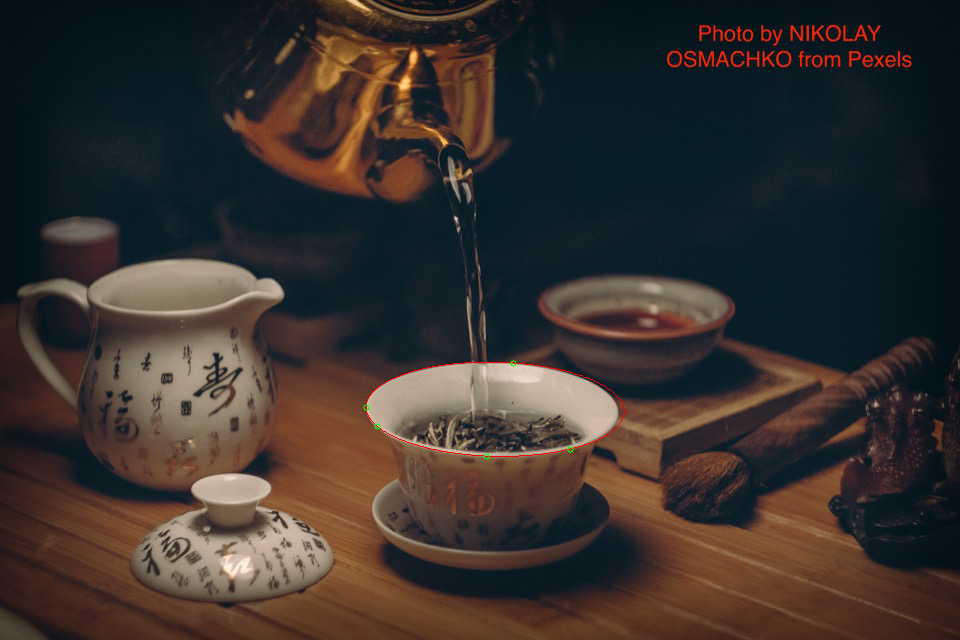

In [0]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565+5, 449] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

[[ 1.00000000e+00 -1.42828025e-01 -4.50093573e+02]
 [-1.42828025e-01  9.18521574e+00 -3.69263986e+03]
 [-4.50093573e+02 -3.69263986e+03  1.72235143e+06]]
Ellipse 
[[-1.68656697e-08]]
[[-6.92671165e-09]]
[[-1.74404704e-08]]
[[-1.17579475e-08]]
[[-6.08270057e-09]]
u =  [[-2.61323195e-04  6.43573428e-01  7.65384331e-01]
 [-2.14394902e-03 -7.65382959e-01  6.43571542e-01]
 [ 9.99997668e-01 -1.47276482e-03  1.57980094e-03]]
m1v.T =  [[-2.61323195e-04  6.43573428e-01  7.65384331e-01]
 [-2.14394902e-03 -7.65382959e-01  6.43571542e-01]
 [ 9.99997668e-01 -1.47276482e-03  1.57980094e-03]]
v =  [[-2.61323195e-04 -2.14394902e-03  9.99997668e-01]
 [ 6.43573428e-01 -7.65382959e-01 -1.47276482e-03]
 [-7.65384331e-01 -6.43571542e-01 -1.57980094e-03]]
usv =  [[ 1.00000000e+00 -1.42828025e-01 -4.50093573e+02]
 [-1.42828025e-01  9.18521574e+00 -3.69263986e+03]
 [-4.50093573e+02 -3.69263986e+03  1.72235143e+06]]


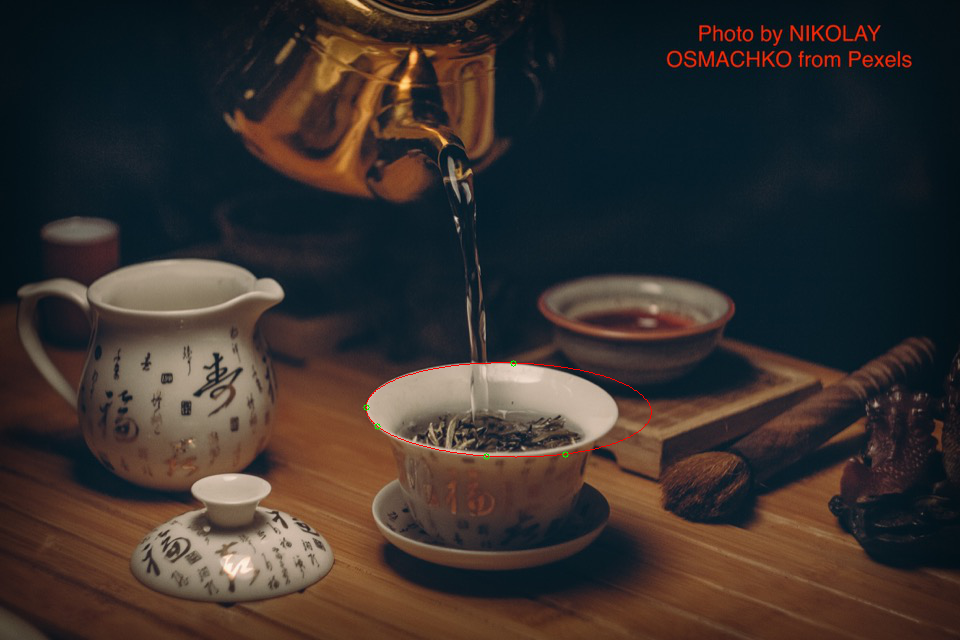

In [0]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449+5] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

#### Conclusion 1:  
A small change of a single point position by 5px along Ox axis make an ellipse change it shape in Ox direction by almost same distance.
However, the same change applied to Oy direction make a huge impact on ellipse shape (extra 15-20px).

### Find ellipse by 6 points

[[ 1.00000000e+00 -1.16373354e-01 -4.45566943e+02]
 [-1.16373354e-01  7.26597384e+00 -2.91496851e+03]
 [-4.45566943e+02 -2.91496851e+03  1.39610288e+06]]
Ellipse 
[[50.3942943]]
[[-58.69564233]]
[[-58.48564852]]
[[33.67018211]]
[[-21.24609974]]
[[54.36299092]]
u =  [[-3.19148426e-04  6.51156358e-01  7.58943539e-01]
 [-2.08792932e-03 -7.58942357e-01  6.51154466e-01]
 [ 9.99997769e-01 -1.37680555e-03  1.60178371e-03]]
m1v.T =  [[-3.19148426e-04  6.51156358e-01  7.58943539e-01]
 [-2.08792932e-03 -7.58942357e-01  6.51154466e-01]
 [ 9.99997769e-01 -1.37680555e-03  1.60178371e-03]]
v =  [[-3.19148426e-04 -2.08792932e-03  9.99997769e-01]
 [ 6.51156358e-01 -7.58942357e-01 -1.37680555e-03]
 [-7.58943539e-01 -6.51154466e-01 -1.60178371e-03]]
usv =  [[ 1.00000000e+00 -1.16373354e-01 -4.45566943e+02]
 [-1.16373354e-01  7.26597384e+00 -2.91496851e+03]
 [-4.45566943e+02 -2.91496851e+03  1.39610288e+06]]


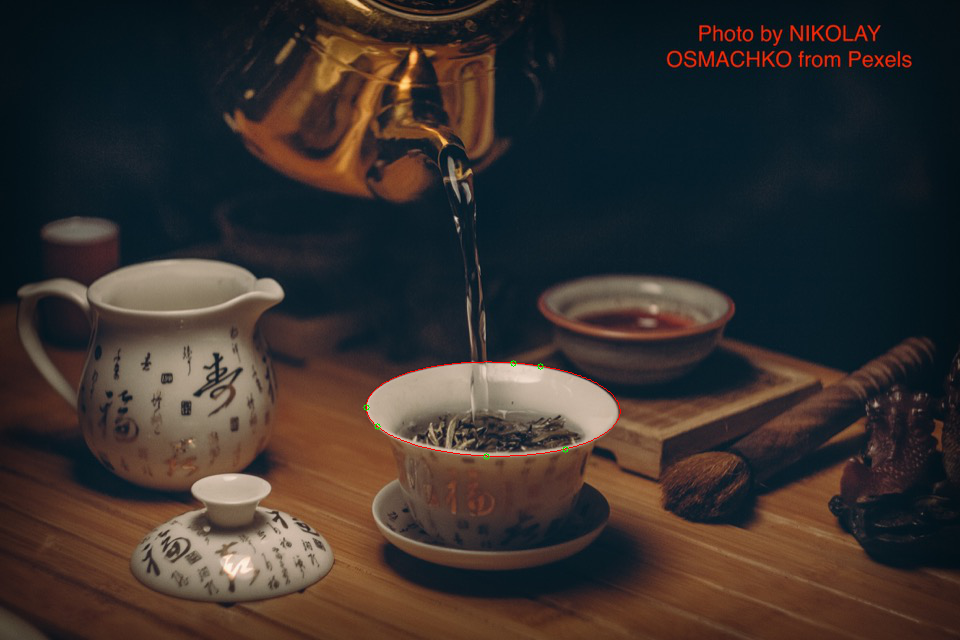

In [0]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [540,366] ], np.double)

m = np.zeros((6,5))
r = np.zeros((6,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]

p = - np.matmul(np.matmul(np.linalg.inv(np.matmul(m.T,m)),m.T),r)

E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double)

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

#### 4.2.2 Check whether 6-points mathod is stable for error.
    1) adding 5px to Ox axis to one point (the same as above)
    2) adding 5px to Oy axis to one point (the same as above)

[[ 1.00000000e+00 -1.43523558e-01 -4.36369596e+02]
 [-1.43523558e-01  7.51172433e+00 -3.00310390e+03]
 [-4.36369596e+02 -3.00310390e+03  1.42844180e+06]]
Ellipse 
[[-0.80944122]]
[[0.93757152]]
[[0.94385548]]
[[-0.52898671]]
[[0.32503496]]
[[-0.86801974]]
u =  [[-3.05484372e-04  6.50262958e-01  7.59709150e-01]
 [-2.10236029e-03 -7.59707924e-01  6.50261063e-01]
 [ 9.99997743e-01 -1.39853776e-03  1.59916592e-03]]
m1v.T =  [[-3.05484372e-04  6.50262958e-01  7.59709150e-01]
 [-2.10236029e-03 -7.59707924e-01  6.50261063e-01]
 [ 9.99997743e-01 -1.39853776e-03  1.59916592e-03]]
v =  [[-3.05484372e-04 -2.10236029e-03  9.99997743e-01]
 [ 6.50262958e-01 -7.59707924e-01 -1.39853776e-03]
 [-7.59709150e-01 -6.50261063e-01 -1.59916592e-03]]
usv =  [[ 1.00000000e+00 -1.43523558e-01 -4.36369596e+02]
 [-1.43523558e-01  7.51172433e+00 -3.00310390e+03]
 [-4.36369596e+02 -3.00310390e+03  1.42844180e+06]]


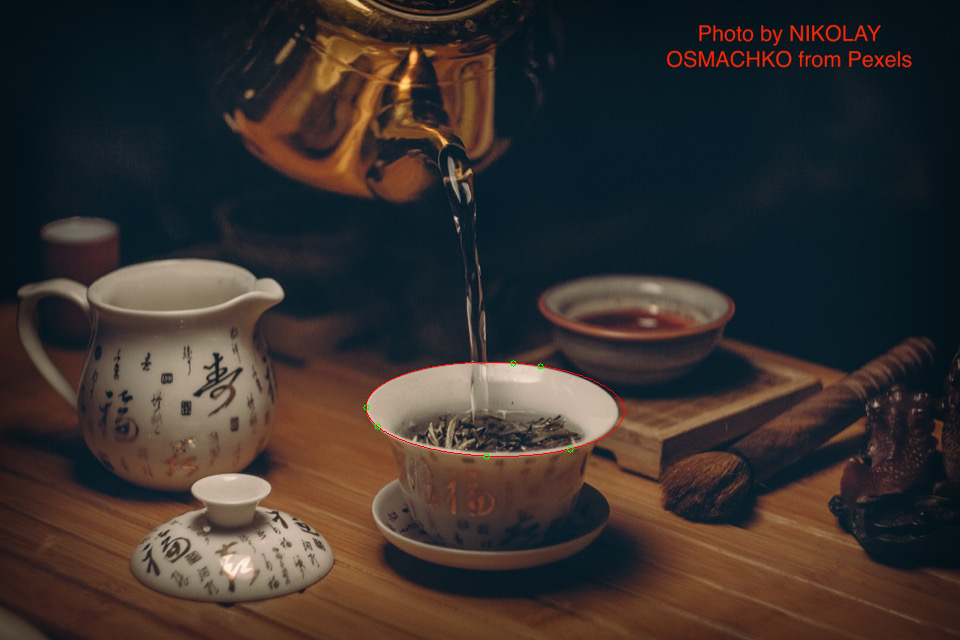

In [0]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565+5, 449], [540,366] ], np.double)

m = np.zeros((6,5))
r = np.zeros((6,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]

p = - np.matmul(np.matmul(np.linalg.inv(np.matmul(m.T,m)),m.T),r)

E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double)

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

[[ 1.00000000e+00 -2.59869623e-01 -3.96107865e+02]
 [-2.59869623e-01  8.44196222e+00 -3.33011236e+03]
 [-3.96107865e+02 -3.33011236e+03  1.54551180e+06]]
Ellipse 
[[-213.4163509]]
[[216.15391343]]
[[262.11212033]]
[[-166.19420803]]
[[98.06001882]]
[[-196.71553734]]
u =  [[-2.56293588e-04  6.46880515e-01  7.62591328e-01]
 [-2.15469527e-03 -7.62589940e-01  6.46878614e-01]
 [ 9.99997646e-01 -1.47736109e-03  1.58927730e-03]]
m1v.T =  [[-2.56293588e-04  6.46880515e-01  7.62591328e-01]
 [-2.15469527e-03 -7.62589940e-01  6.46878614e-01]
 [ 9.99997646e-01 -1.47736109e-03  1.58927730e-03]]
v =  [[-2.56293588e-04 -2.15469527e-03  9.99997646e-01]
 [ 6.46880515e-01 -7.62589940e-01 -1.47736109e-03]
 [-7.62591328e-01 -6.46878614e-01 -1.58927730e-03]]
usv =  [[ 1.00000000e+00 -2.59869623e-01 -3.96107865e+02]
 [-2.59869623e-01  8.44196222e+00 -3.33011236e+03]
 [-3.96107865e+02 -3.33011236e+03  1.54551180e+06]]


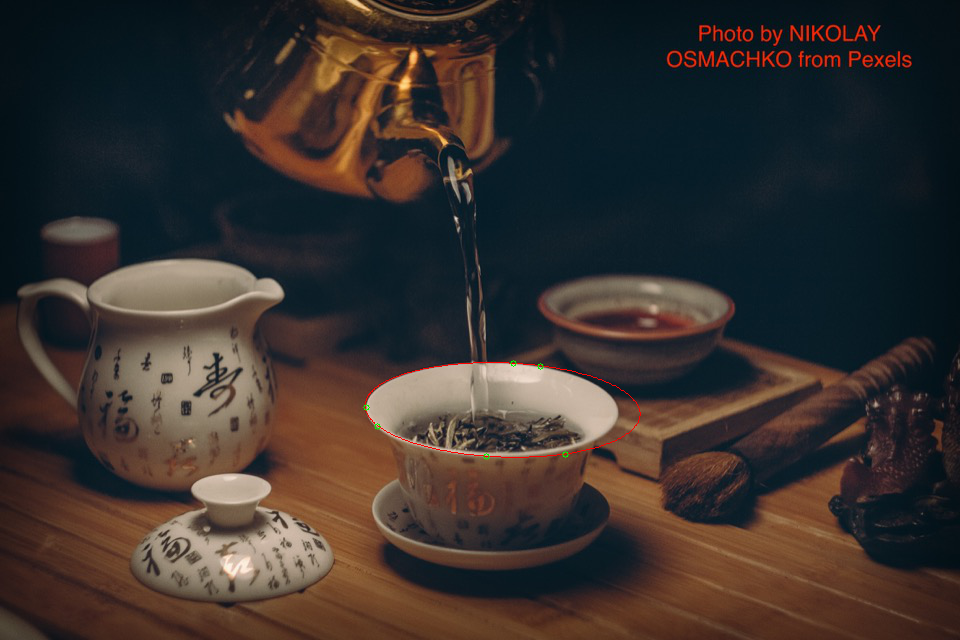

In [0]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449+5], [540,366] ], np.double)

m = np.zeros((6,5))
r = np.zeros((6,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]

p = - np.matmul(np.matmul(np.linalg.inv(np.matmul(m.T,m)),m.T),r)

E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double)

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

#### Conclusion 2:
6-point method is more stable for the errors compared to 5-point one. The changes in x,y coordinate of a single point do not demormate the shape of the ellipse much.